In [1]:
import os,glob,cv2
import numpy as np
import keras  
from keras.preprocessing import image
from keras.models import Model
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [ ]:
#import the model
from keras.applications.vgg16 import VGG16
model_0 = VGG16(weights='imagenet')
model = Model(inputs = model_0.input, outputs=model_0.get_layer("fc2").output)
print(model.summary())

In [11]:
#laod images
ext = ['JPG', 'jpg', 'png']  

files = []
[files.extend(glob.glob( '/content/logos/' + '*.' + e)) for e in ext]
images = [cv2.imread(file) for file in files]


q_files = []
[q_files.extend(glob.glob("/content/queryImages/" + '*.' + e)) for e in ext]
q_images = [cv2.imread(file) for file in q_files]


In [12]:
features = []
q_features = []
for i in files:
  img = image.load_img(i,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  f = model.predict(x)[0]
  features.append(f)

for i in q_files:
  img = image.load_img(i,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  f = model.predict(x)[0]
  q_features.append(f)

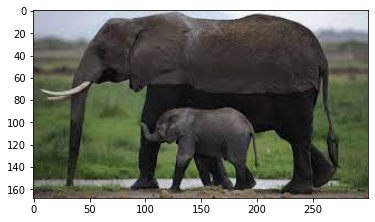

In [13]:
#load random query image
import random
import matplotlib.pyplot as plt
q_image_idx = int(len(q_images) * random.random())
img = image.load_img(q_files[q_image_idx])
plt.imshow(img)

In [14]:
from scipy.spatial import distance
distances=[]
for f in features:
  d = distance.cosine(f, q_features[q_image_idx])
  distances.append(d)

closest_index = sorted(range(len(distances)), key=lambda k: distances[k])[1:5]


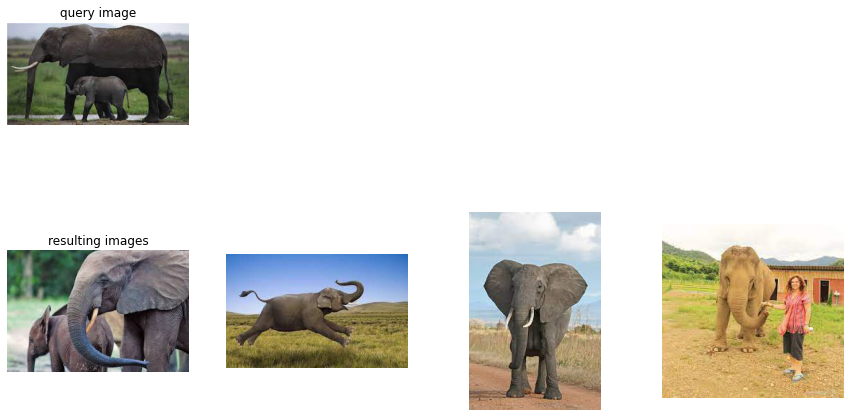

In [17]:
result = []
for idx in closest_index:
    img = image.load_img(files[idx])
    result.append(img)

fig = plt.figure(figsize=(15, 8))
rows = 2
columns = 4

# showing image
def plot_image(idx1,idx2,title,query):
  fig.add_subplot(rows, columns, idx1)
  plt.axis('off')
  #plt.title(title)
  if(query):
    plt.title(title)
    return plt.imshow(image.load_img(q_files[q_image_idx]))
  else:
    return plt.imshow(result[idx2])



plot_image(1,-1,"query image",True)
plot_image(5,0," image 1",False)
plt.title("resulting images")
plot_image(6,1," image 2",False)
plot_image(7,2," image 3",False)
plot_image(8,3,"similar image 4",False)

